# Import Libraries

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Collecting Data

In [4]:
df = pd.read_csv('sample_data/50_Startups.csv')

##  Understanding Data

In [5]:
# Checking the data
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


There are total 4 columns columns
- R&D Spend is Research and Development Spend
- Administration is spend on administration
- Marketing Spend is the amount spend on marketing their product

# Data Cleaning

## Handling Missing Values

In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

There are no Missing Values

## Handling Duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicate values

In [9]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

Data Types of the features is float 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


- Companies spend more amount on Marketing 

## Handling Outliners

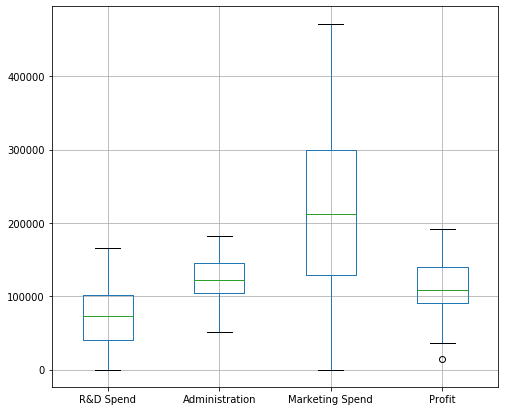

In [12]:
plt.figure(figsize = (8,7))
df.boxplot()

In [13]:
filter = df['Profit'] < 25000
df[filter]

,R&D Spend,Administration,Marketing Spend,Profit
49,0.0,116983.8,45173.06,14681.4


- There is an outliner in the profits column
- But the dataset contains only 50 examples so we have to consider.
- There is only one outliner so it shows not much difference

# Exploratory Data Analysis

## Correlation 

In [14]:
relation = df.corr()
relation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


- correlations above 0.4 to be relatively strong
- correlations between 0.2 and 0.4 are moderate
- Those below 0.2 are considered weak.


## Data Visualization

### Correlation matrix

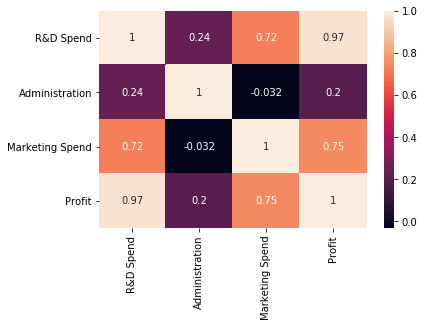

In [15]:
# plt.figure(figsize=(8,6))
sns.heatmap(relation, annot = True)


### Selected Feature VS Target Feature 

In [16]:
# graph for different features and target value
def featureVsProfit(x, relation):
  print(f'{x} vs profit')
  plt.scatter(df[x], df['Profit'], edgecolor = 'white', s = 60)
  plt.xlabel(x, fontsize = 13)
  plt.ylabel('Profits', fontsize = 13)
  corr_value = round(relation[x]['Profit'],2)
  plt.title(f'correlation coefficient: {corr_value} ', fontsize= 16)
  plt.show()

R&D Spend vs profit


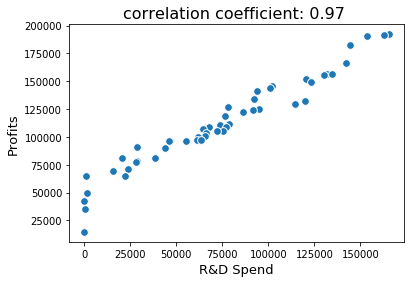

Administration vs profit


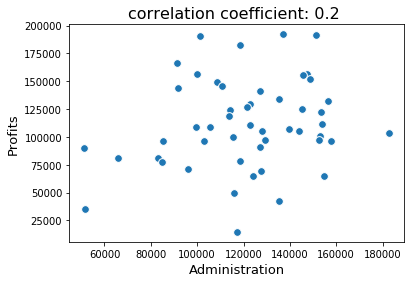

Marketing Spend vs profit


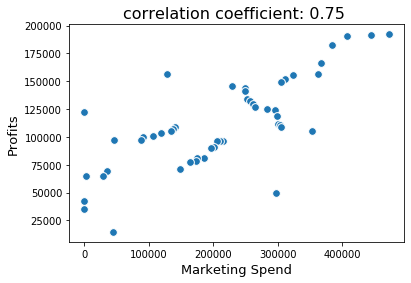

In [17]:
filter = df.columns != 'Profit'
selected_features = df.columns[filter]
for i in selected_features:
  featureVsProfit(i, relation)

# Modeling

In [18]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()
Y = Y.reshape(-1,1)

In [19]:
print(X.shape)
print(Y.shape)

(50, 3)
(50, 1)


## Split the Dataset

In [20]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.8, random_state = 123)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(40, 3)
(10, 3)
(40, 1)
(10, 1)


## Feature Scaling

In [21]:
from sklearn.preprocessing import RobustScaler

scaler_x = RobustScaler()
train_X_scaled = scaler_x.fit_transform(train_X)
test_X_scaled = scaler_x.transform(test_X)
scaler_y = RobustScaler()
train_Y_scaled = scaler_y.fit_transform(train_Y)
test_Y_scaled = scaler_y.transform(test_Y)

## Using Simple Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(train_X_scaled, train_Y_scaled)
scaled_predicted_test_Y = model.predict(test_X_scaled)
reg_score = reg.score(test_X_scaled, test_Y_scaled)
print(f' Score :{reg_score}')

 Score :0.9679176532258635


In [23]:
from sklearn.metrics import mean_squared_error
unscaled_predicted_test_Y = scaler_y.inverse_transform(scaled_predicted_test_Y)
error_value = math.sqrt(mean_squared_error(test_Y, unscaled_predicted_test_Y))
print(f'Error value : {error_value}')

Error value : 6953.64999457958


In [24]:
# Plot for actual value to the true value
def plot_predicted_actual(true_value, predicted_value, score):
  score = round(score, 2)
  plt.scatter(true_value, predicted_value, c='crimson')
  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.title(f'score : {score}', fontsize= 17)
  plt.axis('equal')
  plt.show()

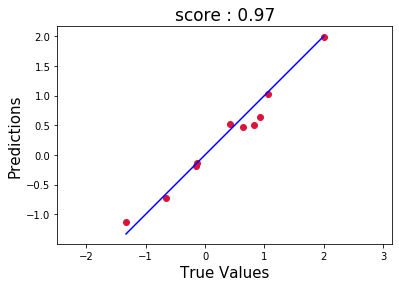

In [25]:
plot_predicted_actual(test_Y_scaled,scaled_predicted_test_Y, reg_score)

## Polynomial Regression

### Ridge Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
    ('polynomial', PolynomialFeatures(interaction_only = True)),
    ('ridge', Ridge())
])

#### GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from scipy.stats import uniform
param_grids = [
    {'polynomial__degree': np.arange(1,20),
    'ridge__alpha' : [1.05,1.0,1.005,0.1,0.10001,0.01,0.001,0.0001, 0.00001]
     }
  ]
grid_search = GridSearchCV(pipe, param_grid= param_grids, scoring = 'neg_mean_squared_error', cv = 25 ) 
grid_search.fit(train_X_scaled, train_Y_scaled) 
print('Best parameters for Ridge Regression using GridSearchCV is: ',end = '')
grid_search.best_params_

Best parameters for Ridge Regression using GridSearchCV is: 

{'polynomial__degree': 1, 'ridge__alpha': 1e-05}

##### Prediction And Error

In [28]:
ridge_model_grid  = grid_search.best_estimator_
scaled_predicted_Y_ridge = ridge_model_grid.predict(test_X_scaled)
unscaled_predicted_Y_ridge = scaler_y.inverse_transform(scaled_predicted_Y_ridge)
error_value = math.sqrt(mean_squared_error(unscaled_predicted_Y_ridge, test_Y))
print(f'Error value: {error_value}')

Error value: 6953.669071976744


##### R2 Score

In [29]:
from sklearn.metrics import r2_score
score_ridge_grid = r2_score(unscaled_predicted_Y_ridge, test_Y)
print(f' R2 Score: {score_ridge_grid}')

 R2 Score: 0.9630680290286178


##### Plot

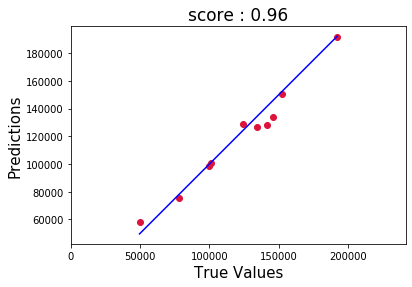

In [30]:
plot_predicted_actual(test_Y,unscaled_predicted_Y_ridge, score_ridge_grid)

### RandomizedSearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(pipe, param_grids, n_iter = 20, scoring = 'neg_mean_squared_error', refit = True, cv = 10, random_state = 0)
random_search.fit(train_X_scaled, train_Y_scaled)
print('Best parameters for Ridge Regression using RandomSearchCV: ', end = '')
random_search.best_params_

Best parameters for Ridge Regression using RandomSearchCV: 

{'ridge__alpha': 0.01, 'polynomial__degree': 1}

#### Error value

In [32]:
ridge_model_random  = grid_search.best_estimator_
scaled_predicted_Y_ridge = ridge_model_random.predict(test_X_scaled)
unscaled_predicted_Y_ridge = scaler_y.inverse_transform(scaled_predicted_Y_ridge.reshape(-1,1))
score_value = math.sqrt(mean_squared_error(unscaled_predicted_Y_ridge, test_Y))
print(f'Error Value: {score_value}')

Error Value: 6953.669071976744


#### R2 Score

In [33]:
score_ridge_random = r2_score(unscaled_predicted_Y_ridge, test_Y)
print(f' Score : {score_ridge_random}')

 Score : 0.9630680290286178


#### Plot

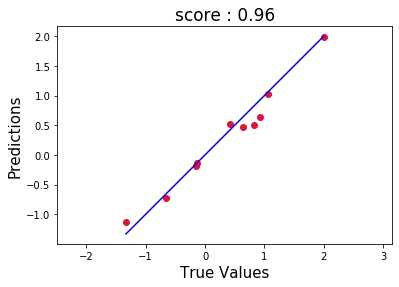

In [34]:
plot_predicted_actual(test_Y_scaled,scaled_predicted_Y_ridge,score_ridge_random)

### Lasso Regression

In [35]:
from sklearn.linear_model import Lasso

In [36]:
pipe_lasso = Pipeline(steps = [
    ('polynomial', PolynomialFeatures(interaction_only = True)),
    ('lasso', Lasso(random_state=0))
])

#### GridSearchCV

In [37]:
param_grids = [
    {'polynomial__degree': np.arange(1,20),
    'lasso__alpha' : [1.05,1.0,1.005,0.1,0.10001,0.01,0.001,0.0001, 0.00001,0.005, 0.02, 0.03, 0.05, 0.06]
     }
  ]
grid_search = GridSearchCV(pipe_lasso, param_grid= param_grids, scoring = 'neg_mean_squared_error', cv = 20 ) 
grid_search.fit(train_X_scaled, train_Y_scaled) 
print('Best parameters for Lasso using GridSearchCv: ', end ='')
grid_search.best_params_

Best parameters for Lasso using GridSearchCv: 

{'lasso__alpha': 0.01, 'polynomial__degree': 1}

##### Error value

In [38]:
model_lasso = grid_search.best_estimator_
scaled_predicted_Y_lasso_grid = model_lasso.predict(test_X_scaled)
unscaled_predicted_Y_lasso_grid = scaler_y.inverse_transform(scaled_predicted_Y_lasso_grid.reshape(-1,1))
error_value = math.sqrt(mean_squared_error(unscaled_predicted_Y_lasso_grid, test_Y))
print(f'error value = {error_value}')

error value = 7242.2228933960005


##### R2 Score

In [39]:
score = r2_score(scaled_predicted_Y_lasso_grid, test_Y_scaled)
print(f'R2 score : {score}')

R2 score : 0.9585136452856527


##### Plot

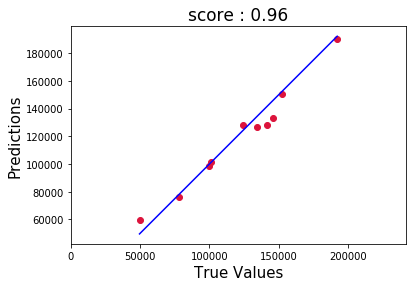

In [40]:
plot_predicted_actual(test_Y, unscaled_predicted_Y_lasso_grid, score)

#### RandomizedSearchCV

In [41]:
random = RandomizedSearchCV(pipe_lasso,param_grids, scoring = 'neg_mean_squared_error', cv = 15, n_iter = 60)
random.fit(train_X_scaled, train_Y_scaled)
print('Best parameters for Lasso Regression using RandomSearchCV: ', end = '')
random.best_params_

Best parameters for Lasso Regression using RandomSearchCV: 

{'polynomial__degree': 17, 'lasso__alpha': 0.02}

##### Error Value

In [42]:
model_test = random.best_estimator_
scaled_predicted_Y = model_test.predict(test_X_scaled)
unscaled_predicted_Y = scaler_y.inverse_transform(scaled_predicted_Y.reshape(-1,1))
error_value = math.sqrt(mean_squared_error(unscaled_predicted_Y, test_Y))
print(f'error value: {error_value}')

error value: 7740.341732300149


##### R2 Score

In [43]:
score = r2_score(scaled_predicted_Y, test_Y_scaled)
print(f'Score : {score}')

Score : 0.9500111707845281


##### Plot

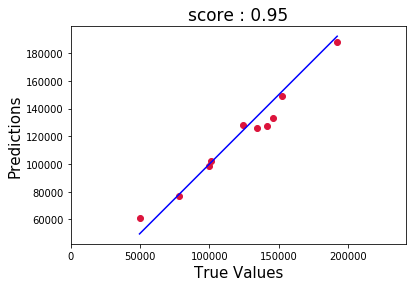

In [44]:
plot_predicted_actual(test_Y, unscaled_predicted_Y, score)

# Conclusion
The R2 Score : **0.9679176532258** <br>
Error Value : **6953.649994579577**

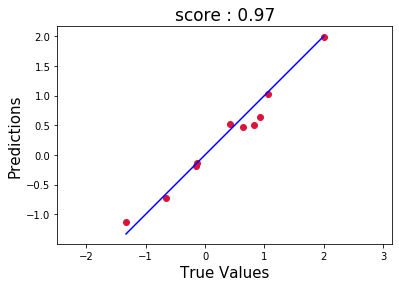

In [45]:
# Final model
plot_predicted_actual(test_Y_scaled,scaled_predicted_test_Y, reg_score)